# **Proyecto final**

Curso:          Fundamentos de Programación en Python para Macroeconomía y Finanzas     
Profesor:       Victor Fuentes Campos     

- Fecha y hora de entrega: Jueves 18 de enero, 9:59pm. **NO HABRÁN PRÓRROGAS**
- Grupos de dos personas por elección libre
- Envíe su tarea haciendo el `push` de su código a su repo en GitHub Classroom

El propósito de este proyecto es que tengan un código de su autoría publicado en GitHub

## Página web

> Según lo discutido en la última clase, **deberán crear su propia página web usando GitHub Pages**. En ella, deberán mostrar el notebook de su proyecto final

Recursos adicionales:

1. Videos tutoriales
    - https://www.youtube.com/watch?v=zyGfECfJ9BY
    - https://www.youtube.com/watch?v=K5xImVmm2Ds


2. Plantillas
    - https://bootstrapmade.com/bootstrap-portfolio-templates/
    - https://cssauthor.com/free-bootstrap-portfolio-templates/

Incluya aquí el link de sus páginas web
- Integrante 1: Elías Gómez
- Integrante 2: Gustavo Torres

Página web: https://qlab-intro-python.github.io/proyecto-final-gustavo_elias_trabajo_final/

## Aplicación

Pautas generales

- Insumos: deberán trabajar al menos dos (2) bases de datos diferentes que requieran alguna transformación (`data wrangling`). Una de ellas tiene que ser un archivo de texto (`.txt`, `.pdf`, `.docx`, etc)
- Tareas: (i) explicar la relevancia del análisis a desarrollar; (ii) utilizar al menos una vez listas, loops y functions para transformar la base de datos cruda y obtener información relevanete; y (iii) aplicar algoritmos de NLP para transformar texto en datos valiosos
- Deberán proveer obligatoriamente gráficos (2 o más) y tablas/cuadros (2 o más) de su libre elección y conclusiones relevantes

Posibles datos para el ejercicio de `data wrangling`

- Estadísticas de 100 años del BCRP. Más [aquí](https://www.bcrp.gob.pe/en/estadisticas/estadisticas-de-100-anos-del-bcrp.html)
- 1,000 años de datos macroeconómicos en Reino Unido. Más [aquí](https://www.kaggle.com/datasets/bank-of-england/a-millennium-of-macroeconomic-data)
- Historial crediticio - Datathon Interbank 2020. Más [aquí](https://www.kaggle.com/competitions/interbank20/data?select=censo_test.csv)
- Ataques terroristas en el mundo. Más [aquí](https://www.kaggle.com/code/gpreda/global-terrorist-attacks/input)
- [World Hapiness Report 2023](https://worldhappiness.report/), compilado por Carla Solís. Más [aquí](https://raw.githubusercontent.com/ccsuehara/python_para_las_ccss/main/Clase%205/data/world-happiness-report-2023.csv)
- Otros datos del BCRP, MEF, SBS, SMV, BVL, INEI, etc.
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos


Posibles datos para el ejercicio de NLP

- Federal Open Market Committee (FOMC) meetings statements. Más [aquí](https://www.federalreserve.gov/monetarypolicy/fomccalendars.htm). El repo incluye tres archivos `.docx`
- Programa Monetario del Banco Central de Reserva del Perú (BCRP). Más [aquí](https://www.bcrp.gob.pe/transparencia/actividades-oficiales/notas-informativas.html). El repo incluye tres archivos `.pdf`
- Mensajes presidenciales de Carla Solís y Luis Eduardo San Martín. [Acá](https://github.com/ccsuehara/Peruvian-presidents-speeches/tree/master/data/presidentialSpeechPeru/txt) los archivos
- "Fake vs real news" de George McIntire. Más info [aquí](https://opendatascience.com/how-to-build-a-fake-news-classification-model/). La base de datos está alojada en su [repo](https://github.com/GeorgeMcIntire/fake_real_news_dataset?tab=readme-ov-file)
- Coronavirus tweets de Kaggle. Más info [aquí](https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification)
- Twitter Financial News de Kaggle. Más infor [aquí](https://www.kaggle.com/datasets/sulphatet/twitter-financial-news)
- Cualquier otra base de datos que consideren relevante. En este caso, también deberán proveer la base de datos original en el repo. De ser muy grande, deberá ofrecer un link a la plataforma de almacenamiento en la nuba de su elección (Dropbox, Drive, OneDrive, etc) que permita el acceso a dichos datos

In [6]:
import requests
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from matplotlib.dates import YearLocator

In [21]:
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = 'PM05563BA' 
form_out  = '/json'
period    = '/1950/2021'
url_final = url_base+cod_var+form_out+period

TI_BCRP=requests.get(url_final)
data_ti = TI_BCRP.json()
PBI_BCRP=requests.get('https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PM05373BA/json/1950/2021')
data_pbi=PBI_BCRP.json()


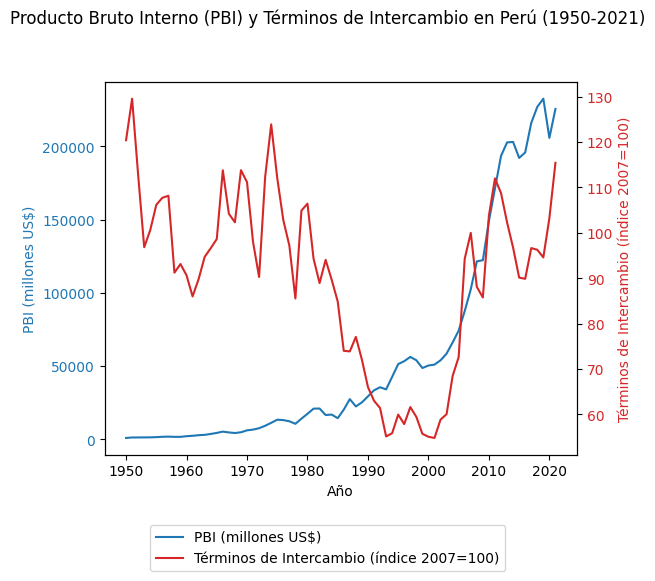

In [38]:
# Crear DataFrames a partir de los datos
df_pbi = pd.DataFrame(data_pbi['periods'])
df_pbi['value'] = [float(value[0].replace(',', '')) for value in df_pbi['values']]
df_pbi['date'] = pd.to_datetime(df_pbi['name'])

df_ti = pd.DataFrame(data_ti['periods'])
df_ti['value'] = [float(value[0].replace(',', '')) for value in df_ti['values']]
df_ti['date'] = pd.to_datetime(df_ti['name'])

# Crear gráfica con dos ejes
fig, ax1 = plt.subplots()

# PBI en el eje y1
color = 'tab:blue'
ax1.set_xlabel('Año')
ax1.set_ylabel('PBI (millones US$)', color=color)
ax1.plot(df_pbi['date'], df_pbi['value'], label='PBI (millones US$)', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Términos de intercambio en el eje y2
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Términos de Intercambio (índice 2007=100)', color=color)
ax2.plot(df_ti['date'], df_ti['value'], label='Términos de Intercambio (índice 2007=100)', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir título y leyenda
fig.tight_layout()
fig.suptitle('Producto Bruto Interno (PBI) y Términos de Intercambio en Perú (1950-2021)', y=1.05)
# Mover la leyenda abajo del gráfico
fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.01))

# Ajustar el diseño del gráfico
fig.tight_layout()
# Mostrar gráfica
plt.show()

DataFrame transformado:
       Fecha       Valor  Tasa_Crecimiento_Annual
1 1951-01-01  129.556136                 7.599896
2 1952-01-01  112.769497               -12.957038
3 1953-01-01   96.835372               -14.129818
4 1954-01-01  100.606872                 3.894755
5 1955-01-01  106.173266                 5.532817


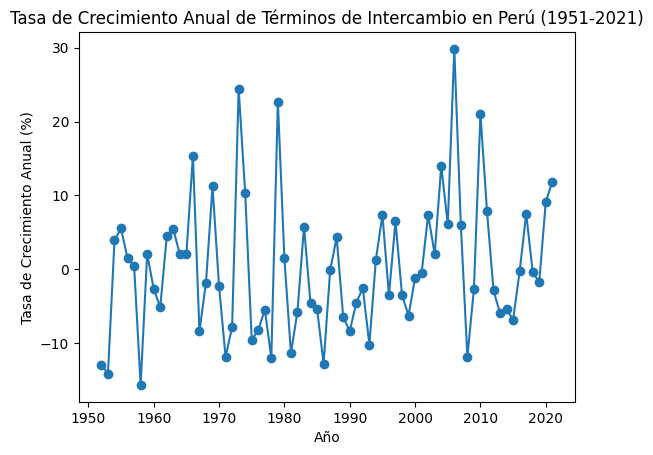

In [30]:
def transformar_base_datos_cruda(data_cruda):
    periodos = data_cruda.get('periods', [])
    valores = [float(periodo['values'][0].replace(',', '')) for periodo in periodos]
    fechas = [pd.to_datetime(periodo['name']) for periodo in periodos]

    # Crear DataFrame transformado
    df_transformado = pd.DataFrame({
        'Fecha': fechas,
        'Valor': valores
    })

    return df_transformado

def calcular_tasa_crecimiento_anual(df_transformado):
    # Calcular la tasa de crecimiento anual
    df_transformado['Tasa_Crecimiento_Annual'] = df_transformado['Valor'].pct_change() * 100

    # Eliminar la primera fila con valor NaN
    df_transformado = df_transformado.dropna()

    return df_transformado

# Obtener datos de términos de intercambio
url_ti = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PM05563BA/json/1950/2021'
response_ti = requests.get(url_ti)
data_ti = response_ti.json()

# Aplicar la transformación de la base de datos cruda
df_ti_transformado = transformar_base_datos_cruda(data_ti)

# Calcular la tasa de crecimiento anual
df_ti_transformado = calcular_tasa_crecimiento_anual(df_ti_transformado)

# Imprimir las primeras filas del DataFrame transformado
print("DataFrame transformado:")
print(df_ti_transformado.head())

# Crear gráfico con la tasa de crecimiento anual
plt.plot(df_ti_transformado['Fecha'][1:], df_ti_transformado['Tasa_Crecimiento_Annual'][1:], marker='o')
plt.title('Tasa de Crecimiento Anual de Términos de Intercambio en Perú (1951-2021)')
plt.xlabel('Año')
plt.ylabel('Tasa de Crecimiento Anual (%)')
plt.show()

# Ejercicio de NLP
## Federal Open Market Committe
### Word counts and bag-of-words

- Theory: the more frequent the word, the more central it might be
- Basic method for finding topics in a text

In [63]:
!pip install stylecloud

     -------------------------------------- 262.1/262.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------- 161.4/161.4 kB 10.1 MB/s eta 0:00:00
     -------------------------------------- 332.3/332.3 kB 1.9 MB/s eta 0:00:00
     -------------------------------------- 88.3/88.3 kB 987.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 87.8/87.8 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for stylecloud: filename=stylecloud-0.5.2-py3-none-any.whl size=259507 sha256=da2bb1fabc46dcf85ddbbb69fa7deaa7b65a063740cae8ff230d80594b191c46
  Stored in directory: c:\users\aixa\appdata\local\pip\cache\wheels\a3\18\6c\d1f2ab0675b58b7df4c6284879442776310f79e9bdc53fbd3b
  Creat

In [65]:
import nltk
import stylecloud
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aixa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aixa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aixa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Aixa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize, TweetTokenizer

In [6]:
!pip install WordCloud

     ------------------------------------ 300.0/300.0 kB 488.6 kB/s eta 0:00:00


In [8]:
!pip install PyPDF2

     ------------------------------------ 232.6/232.6 kB 430.9 kB/s eta 0:00:00


In [9]:
from wordcloud import WordCloud
import PyPDF2
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import WordNetLemmatizer
import codecs

In [11]:
# Abrimos el archivo PDF
with open('FOMCpresconf20231213.pdf', 'rb') as f:
    # Creamos un objeto PdfReader para leer el archivo
    reader = PyPDF2.PdfReader(f)

    # Inicializamos una cadena de texto vacía
    text = ""

    # Recorremos cada página del archivo PDF
    for page in range(len(reader.pages)):
        # Extraemos el texto de la página
        page_text = reader.pages[page].extract_text()

        # Añadimos el texto de la página a la cadena de texto
        text += page_text

# Imprimimos el texto del archivo PDF
print(text)

December 13 , 2023   Chair Powell’s Press Conference   FINAL  
 
Page 1 of 24  
 Transcript of Chair Powell’s Press Conference 
December 13, 2023 
 
CHAIR POWELL.  Good afternoon.  My colleagues and I remain squarely focused on 
our dual mandate to promote maximum employment and stable prices for the American people.  
As we approach the end of the year, it ’s natural to look back on the progress that has been 
made toward our dual -mandate objectives.  Inflation has eased from its highs, and this has come 
without a significant increase in unemployment.  That ’s very good news.  But inflation is still too 
high, ongoing progress in bringing it down is not assured, and the path forward is uncertain.  As 
we look ahead to next year, I want to assure the American people that we’ re fully committed to 
returning inflation to our 2 pe rcent goal.  Restoring price stability is essential to achieve a 
sustained period of strong labor market conditions that benefit all.  
Since early last yea

In [22]:
tokens = word_tokenize(text)
tokens

['December',
 '13',
 ',',
 '2023',
 'Chair',
 'Powell',
 '’',
 's',
 'Press',
 'Conference',
 'FINAL',
 'Page',
 '1',
 'of',
 '24',
 'Transcript',
 'of',
 'Chair',
 'Powell',
 '’',
 's',
 'Press',
 'Conference',
 'December',
 '13',
 ',',
 '2023',
 'CHAIR',
 'POWELL',
 '.',
 'Good',
 'afternoon',
 '.',
 'My',
 'colleagues',
 'and',
 'I',
 'remain',
 'squarely',
 'focused',
 'on',
 'our',
 'dual',
 'mandate',
 'to',
 'promote',
 'maximum',
 'employment',
 'and',
 'stable',
 'prices',
 'for',
 'the',
 'American',
 'people',
 '.',
 'As',
 'we',
 'approach',
 'the',
 'end',
 'of',
 'the',
 'year',
 ',',
 'it',
 '’',
 's',
 'natural',
 'to',
 'look',
 'back',
 'on',
 'the',
 'progress',
 'that',
 'has',
 'been',
 'made',
 'toward',
 'our',
 'dual',
 '-mandate',
 'objectives',
 '.',
 'Inflation',
 'has',
 'eased',
 'from',
 'its',
 'highs',
 ',',
 'and',
 'this',
 'has',
 'come',
 'without',
 'a',
 'significant',
 'increase',
 'in',
 'unemployment',
 '.',
 'That',
 '’',
 's',
 'very',
 'good'

In [14]:
len(text)

47569

In [15]:
sentences = sent_tokenize(text)
sentences

['December 13 , 2023   Chair Powell’s Press Conference   FINAL  \n \nPage 1 of 24  \n Transcript of Chair Powell’s Press Conference \nDecember 13, 2023 \n \nCHAIR POWELL.',
 'Good afternoon.',
 'My colleagues and I remain squarely focused on \nour dual mandate to promote maximum employment and stable prices for the American people.',
 'As we approach the end of the year, it ’s natural to look back on the progress that has been \nmade toward our dual -mandate objectives.',
 'Inflation has eased from its highs, and this has come \nwithout a significant increase in unemployment.',
 'That ’s very good news.',
 'But inflation is still too \nhigh, ongoing progress in bringing it down is not assured, and the path forward is uncertain.',
 'As \nwe look ahead to next year, I want to assure the American people that we’ re fully committed to \nreturning inflation to our 2 pe rcent goal.',
 'Restoring price stability is essential to achieve a \nsustained period of strong labor market conditions th

- Use `word_tokenize` to tokenize the fourth sentence

In [16]:
tokenized_sent = word_tokenize(sentences[3])
tokenized_sent

['As',
 'we',
 'approach',
 'the',
 'end',
 'of',
 'the',
 'year',
 ',',
 'it',
 '’',
 's',
 'natural',
 'to',
 'look',
 'back',
 'on',
 'the',
 'progress',
 'that',
 'has',
 'been',
 'made',
 'toward',
 'our',
 'dual',
 '-mandate',
 'objectives',
 '.']

In [17]:
unique_tokens = set(word_tokenize(text))
unique_tokens

{'Growth',
 'distortions',
 'bottoms',
 'New',
 'behind',
 'measures',
 'reserves',
 'lation',
 'uncertainty',
 'back-',
 'consistent',
 'papers',
 'question',
 '2026',
 'extended',
 'JEAN',
 'premature',
 'better-',
 'nevertheless',
 '3.8',
 'use',
 'of',
 '90',
 'a—',
 'definitely',
 '-and-forth',
 'thinking',
 'FOMC',
 '—I',
 'as',
 'time',
 'they',
 'goods',
 'Chair',
 'federal',
 '—which',
 'help',
 'ing',
 'quarter',
 'revised',
 'temporarily',
 '-',
 'restrictive',
 's',
 'Times',
 'living',
 'believe',
 'at—it',
 '-run',
 '25',
 'inso—',
 'volatile',
 'come',
 'admission',
 'th',
 'no',
 'thresholds',
 'without',
 'While',
 'or',
 'place',
 'Given',
 '—you',
 'documents',
 'robust',
 'structural',
 'know',
 'month—look',
 'Wall',
 '-stability',
 'landing',
 'working',
 'data',
 'PPI',
 'quits',
 'build',
 'bring',
 'real',
 'been',
 't',
 'unexpected',
 'out',
 '’',
 'moving',
 'mandate',
 '2024',
 'talking',
 'SCHNEIDER',
 'fully',
 'prepared',
 'these',
 'sometimes',
 've',
 

- Convert the tokens into lowercase

In [23]:
lower_tokens = [t.lower() for t in tokens]
lower_tokens

['december',
 '13',
 ',',
 '2023',
 'chair',
 'powell',
 '’',
 's',
 'press',
 'conference',
 'final',
 'page',
 '1',
 'of',
 '24',
 'transcript',
 'of',
 'chair',
 'powell',
 '’',
 's',
 'press',
 'conference',
 'december',
 '13',
 ',',
 '2023',
 'chair',
 'powell',
 '.',
 'good',
 'afternoon',
 '.',
 'my',
 'colleagues',
 'and',
 'i',
 'remain',
 'squarely',
 'focused',
 'on',
 'our',
 'dual',
 'mandate',
 'to',
 'promote',
 'maximum',
 'employment',
 'and',
 'stable',
 'prices',
 'for',
 'the',
 'american',
 'people',
 '.',
 'as',
 'we',
 'approach',
 'the',
 'end',
 'of',
 'the',
 'year',
 ',',
 'it',
 '’',
 's',
 'natural',
 'to',
 'look',
 'back',
 'on',
 'the',
 'progress',
 'that',
 'has',
 'been',
 'made',
 'toward',
 'our',
 'dual',
 '-mandate',
 'objectives',
 '.',
 'inflation',
 'has',
 'eased',
 'from',
 'its',
 'highs',
 ',',
 'and',
 'this',
 'has',
 'come',
 'without',
 'a',
 'significant',
 'increase',
 'in',
 'unemployment',
 '.',
 'that',
 '’',
 's',
 'very',
 'good'

- Create a `Counter` with the lowercase tokens

In [27]:
bowl_simple = Counter(lower_tokens)
print(bowl_simple.most_common(25))

[(',', 655), ('.', 477), ('the', 378), ('’', 343), ('that', 258), ('to', 247), ('we', 212), ('of', 202), ('and', 201), ('you', 184), ('s', 152), ('a', 128), ('it', 121), ('is', 113), ('i', 91), ('in', 87), ('re', 85), ('so', 79), ('know', 78), ('at', 64), ('be', 64), ('on', 63), ('chair', 62), ('powell', 62), ('inflation', 62)]


### Text preprocessing
#### Lemmatizer

In [31]:
!pip install nltk

In [33]:
from nltk.stem import WordNetLemmatizer
import codecs

In [42]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Aixa\AppData\Roaming\nltk_data...


True

In [29]:
stopwords = nltk.corpus.stopwords.words('english')

In [45]:
list_of_bag_words = ['conference', 'final', 'page']

In [46]:
stopwords.extend(list_of_bag_words)

In [48]:
# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)

# Print the 10 most common tokens
print(bow.most_common(25))

[('know', 78), ('chair', 62), ('powell', 62), ('inflation', 62), ('rate', 53), ('think', 48), ('year', 44), ('policy', 41), ('percent', 40), ('see', 37), ('would', 36), ('question', 29), ('thing', 29), ('economy', 27), ('really', 27), ('press', 26), ('back', 26), ('december', 25), ('labor', 24), ('growth', 24), ('time', 23), ('people', 22), ('market', 22), ('look', 21), ('progress', 21)]


### WordCloud
#### Formas populares de WordCloud: nube y logotipo de Apple

- Diferentes tonalidades

In [57]:
my_pdf = input()

FOMCpresconf20231213.pdf


In [58]:
# Abrimos el archivo PDF
with open(my_pdf, 'rb') as f:
    # Creamos un objeto PDFReader para leer el archivo
    reader = PyPDF2.PdfReader(f)

    # Creamos un archivo de texto para escribir el contenido del PDF
    with open('documento.txt', 'w', encoding="utf-8") as text_file:
        # Recorremos cada página del archivo PDF
        for page in range(len(reader.pages)):
            # Extraemos el texto de la página
            page_text = reader.pages[page].extract_text()
            # Escribimos el texto en el archivo de texto
            text_file.write(page_text)

my_txt = 'documento.txt'

In [59]:
# Abrimos el archivo en modo de lectura
with open(my_txt, 'r', encoding='utf-8') as f:
  # Leemos el contenido del archivo y lo asignamos a una variable
  texto = f.read()

# Convertimos el texto a minúsculas y dividimos el contenido en palabras
words = texto.lower().split()

# Contamos la frecuencia de cada palabra
word_counts = Counter(words)

# Ordenamos las palabras por su frecuencia de mayor a menor
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Seleccionamos las n palabras más frecuentes
n = 500  # Número máximo de palabras a incluir en la nube de palabras
top_words = [word for word, count in sorted_word_counts[:n]]

cadena = ' '.join(top_words)

In [60]:
with open('my_txt.txt', 'w') as f:
    for element in top_words:
        f.write(element + '\n')

In [69]:
#cmocean.sequential.Algae_7
mp_pastel_4 = 'cartocolors.qualitative.Pastel_4'
mp_oficina_4 = 'cartocolors.diverging.Earth_4'
mp_bold_3 = 'cartocolors.qualitative.Bold_3'
mp_sunset_2 = 'cartocolors.sequential.Sunset_2'
mp_GY_2 = 'cartocolors.sequential.agGrnYl_2'
mp_ocean_4 = 'cmocean.sequential.Turbid_4'
mp_set3_6 = 'colorbrewer.qualitative.Set3_6'
mp_set1_6 = 'colorbrewer.qualitative.Set1_6'
mp_dark2_6 = 'colorbrewer.qualitative.Dark2_6'
mp_accent_5 = 'colorbrewer.qualitative.Accent_5'
mp_paired_10 = 'colorbrewer.qualitative.Paired_10'
mp_BG_2 = 'lightbartlein.diverging.BlueGrey_2'

mmpp = [mp_pastel_4, mp_oficina_4, mp_bold_3, mp_sunset_2,
        mp_GY_2, mp_ocean_4, mp_set3_6, mp_set1_6, mp_dark2_6, mp_accent_5,
        mp_paired_10, mp_BG_2]

#fab fa-apple
#<i class="fa-sharp fa-solid fa-droplet"></i>
mm_apple = 'fab fa-apple'
mm_youtube = 'fab fa-youtube'
mm_twitter = 'fab fa-twitter'
mm_linkedin = 'fab fa-linkedin'
mm_facebook = 'fab fa-facebook'
mm_user = 'fas fa-user'
mm_house = 'fas fa-house'
mm_money = 'fas fa-money-bill'
mm_wallet = 'fas fa-wallet'
mm_globe = 'fas fa-globe'
mm_cloud = 'fas fa-cloud'

In [85]:
mmpp = [mp_pastel_4, mp_oficina_4, mp_bold_3, mp_sunset_2,
        mp_GY_2, mp_ocean_4, mp_set3_6, mp_set1_6, mp_dark2_6, mp_accent_5,
        mp_paired_10, mp_BG_2]

# Use a dictionary comprehension to create a dictionary of default ages
dic_mmpp = {mp: f'eg_cloud_{my_pdf}_{mp}.png' for mp in mmpp}
# Use a list comprehension to create a list of lists with two elements each
lists_mmpp = [[mp, mp_png] for mp, mp_png in dic_mmpp.items()]

In [86]:
import codecs

for palette, output_name in lists_mmpp:
    # Read the file with the appropriate encoding (e.g., 'latin-1')
    with codecs.open('my_txt.txt', 'r', encoding='latin-1') as f:
        text_content = f.read()

    # Generate a stylecloud with the current palette
    cloud = stylecloud.gen_stylecloud(text=text_content,
                                      icon_name=mm_cloud, 
                                      background_color='white', 
                                      palette=palette,
                                      custom_stopwords=stopwords,
                                      size=(1920, 1080),
                                      max_font_size=144,
                                      output_name=output_name)

In [87]:
mmpp = [mp_pastel_4, mp_oficina_4, mp_bold_3, mp_sunset_2,
        mp_GY_2, mp_ocean_4, mp_set3_6, mp_set1_6, mp_dark2_6, mp_accent_5,
        mp_paired_10, mp_BG_2]

# Use a dictionary comprehension to create a dictionary of default ages
dic_mmpp = {mp: f'eg_apple_{my_pdf}_{mp}.png' for mp in mmpp}
# Use a list comprehension to create a list of lists with two elements each
lists_mmpp = [[mp, mp_png] for mp, mp_png in dic_mmpp.items()]

In [88]:
for palette, output_name in lists_mmpp:
    # Read the file with the appropriate encoding (e.g., 'latin-1')
    with codecs.open('my_txt.txt', 'r', encoding='latin-1') as f:
        text_content = f.read()
    cleaned_text = re.sub(r'[^\x20-\x7E]', '', text_content)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

    # Generate a stylecloud with the current palette
    cloud = stylecloud.gen_stylecloud(text=text_content,
                                      icon_name=mm_apple, 
                                      background_color='white', 
                                      palette=palette,
                                      custom_stopwords=stopwords,
                                      size=(1920, 1080),
                                      max_font_size=144,
                                      output_name=output_name)